# Regularization: Penalized regression (PRASHANT)
Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

1. Ridge regression
2. Lasso regression
3. Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is **price** and the features are 10 polynomial features of **LSTAT**: % lower status of the population. LSTAT2= $LSTAT^2$, LSTAT3= $LSTAT^3$, and etc.


**Advantages of Regularization**

We can use regularized model to reducte the dimensionality of the training dataset. Dimensionality reduction is important becasue of three main reasons:
- **Prevents Overfitting**: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures borh real and random effects).
- **Simplicity**: An over-complex model having too many features can be hard to interpret especially when feature are correlated with each other/
- **Compututional Efficiency**: A model trained on a lower dimensional datraset is computationally efficient (execution of algorithm requires less computational time).

**Disadvantages of Regularization**

Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high **bias error*.

If regularization is performed before training the model, a perfect balance between **bias-variance-tradeoff** must be used

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [23]:
# we use this rand_state = 1000 to keep getting the same data 
rand_state= 1000

In [24]:
# Importing the data
df = pd.read_csv("Regularization_synthetic.csv")

In [25]:
# check first 5 rows of the data
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


### Let visualize X1 and y

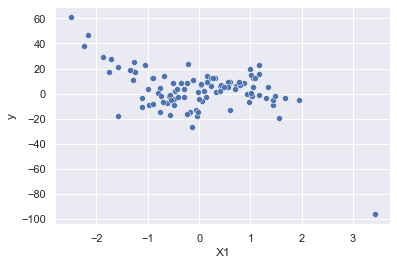

In [26]:
# plot data
sns.scatterplot(x='X1', y='y', data=df)
plt.show()

### Standardize the data

**important** we need to normalize the features before training the models. Why?

The features have to be in the same sort of range therefore the coefficients are also comparibale 

In [27]:
from sklearn.preprocessing import StandardScaler

**StandardScalar: subtract the average and divide it by standard deviation**

In [28]:
# Standardize the data set
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [29]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


In [30]:
# Get statistical info of the df
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


**Manually calculating the standardize scale for  first observation in df_sc for y1**

In [33]:
 # Manually calculating the standardize scale for  first observation in df_sc for y1
(-3.901562-3.163589)/17.251525

-0.4095377655018904

In [34]:
# Convet standarlized df into a dataframe
df.columns
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


The output of -0.4095377655018904 is close to y -0.411601 (differnce is due to rounding error)

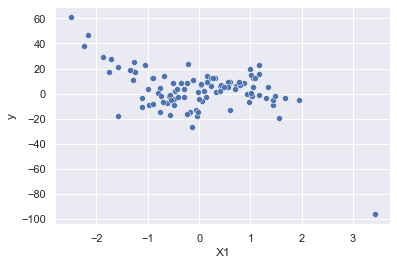

In [35]:
# plot data
sns.scatterplot(x='X1', y='y', data=df)
plt.show()

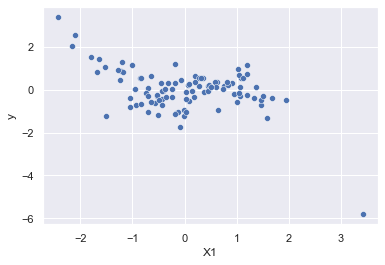

In [36]:
# plot data
sns.scatterplot(x='X1', y='y', data=df_sc)
plt.show()

**When we compare df with df_sc we can see that the patern is still the same in the scatterplot however the scale has changed from -100 and 60 to -6 and 2**

# Splitting the data

We are going to split the data into a train and test set

X will contain our independent features\
y will contain our dependent features

In [37]:
# The independent feutres
X = df_sc.drop('y', axis=1)

# The dependent features
y = df_sc['y']

rand_state=1000

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rand_state)

In [38]:
# Check the train data
X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


AS we can see from teh table above, the variables are **highly correlated** with each other.

Lest's first run a linear regression (using statsmodel.api) and see the resulst as a benchmark

In [39]:
# This is not neseciary in Machine Learning 
# wc = with constant 
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [40]:
# Simple Linear Regression
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.28e-08
Time:                        13:45:19   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Closer the P value is to 0 the more important the feature is the further away the P value is from 0 the featue can be dropped**

# A) Training the models

In this section we will train 4 different models:
    
    1. Linear Regression (model_linear)
    2. Ridge Regression (model_ridge)
    3. Lasso Regression (model_lasso)
    4. Elastic Net Regression(model_net)

In [41]:
# Import libarires
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

If we put alpha=0 then it will always be a linear regression model if alpha=1 we use Lasso regression if we put alpha=2 we use ridge regression

In [42]:
# ging the regression model a class
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)

In [45]:
#fitting our data set and predinct our dataset (We make predictions on our X_test data and evualte them with our y_test data)
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso  = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net  = model_net.fit(X_train, y_train).predict(X_test)

In [46]:
df_predictions = pd.DataFrame({'y_test': y_test,
                              'y_hat_linear': y_hat_linear,
                              'y_hat_ridge': y_hat_ridge,
                              'y_hat_lasso': y_hat_lasso,
                              'y_hat_net': y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


# Coefficinets

In [48]:
# drop dependent features to get the independent features
df.drop('y', axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [49]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


# Performance in the test set

In [50]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [51]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [52]:

MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [53]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

# Plotting the regression coefficients vs alphas:


### ridge regression coefficientsvs alpha

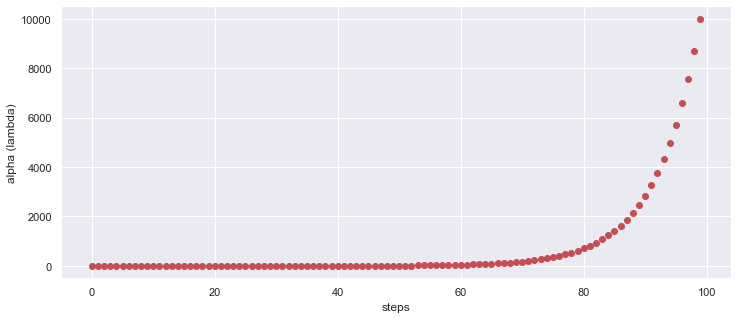

In [54]:
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

**From the above graph we can see that as our steps increase our alpha also increases**

In [55]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 5)

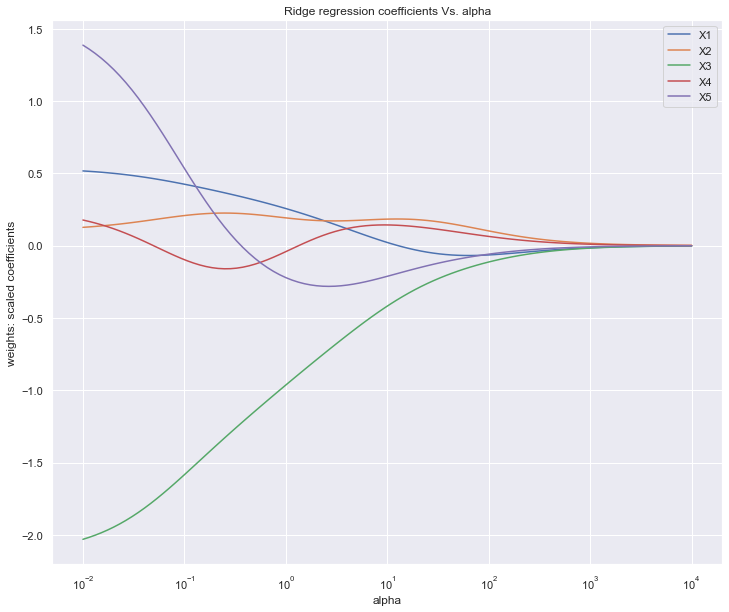

In [56]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

**From the graph above we can see that when the alpha increases the weight of the coefficients (independen features) get close to 0. keep in mind  that this is Ridge regession so features will never hit 0 but close to 0. Based on this decession can be made of with what features we want to conitunue with our machine learnin model**

**Features close to 0 can be dropped and features quite above 0 can be used for our machine learning model**

# Lasso Regression coefficients vs alpha

In [57]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [59]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 5)

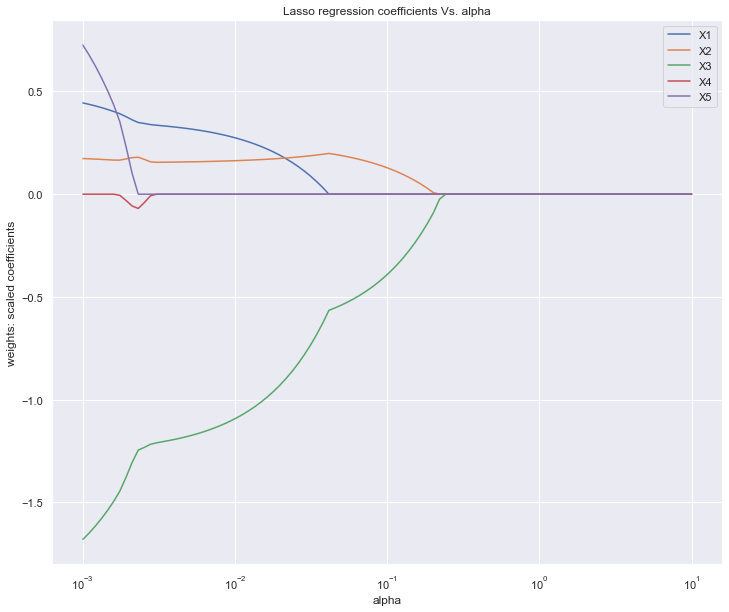

In [60]:

plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()


**From the graph above we can see that when the alpha increases the weight of the coefficients (independen features) get 0. Features with coefficients of 0 will be droppend for our Machine Learning Model**

**This is the big difference with between Lasso and Ridge Regression**
- Ridg Regression will get the features coefficients close to 0
- Lasso Regression wil get the features coefficients to 0

**Features close to 0 can be dropped and features quite above 0 can be used for our machine learning model**

From the above graph:
- Features x5, x4 can be dropped as their coefficient is 0

# Elastic Net Regression coefficients vs alpha

In [62]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [63]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)


(100, 5)

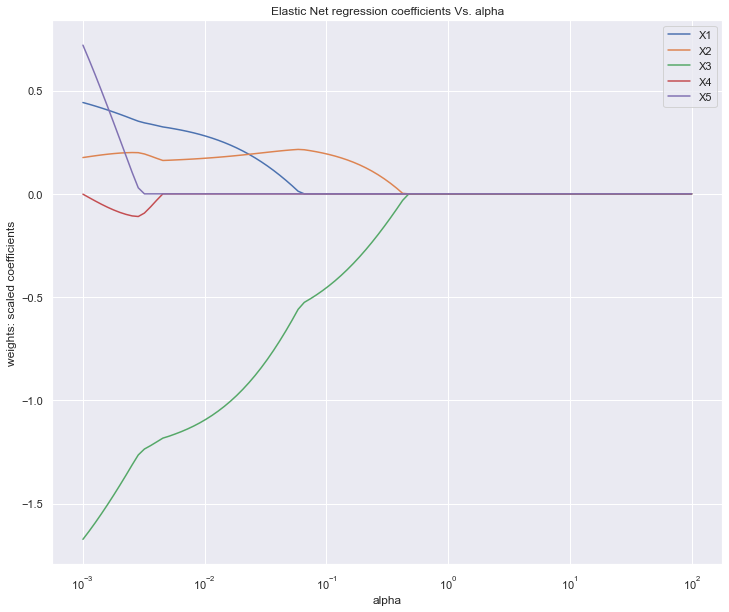

In [64]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

**Elastic Net Regression looks slightly simmilar as Lasso Regression however there is a difference in numbers. This difference we will see later on**



# Cross Validation

Let's use cross validation to find the optimal Lambdas(alphas) for different models

In Cross Validaition **Gradient Descent** is used to find the best alpha for the model

### Optimal alpha for Ridge Regression

In [71]:
# Import libarires
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [72]:
# to calculate to optimal alpha we will use Cross Validation (CV)
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [73]:
# Put the optimal alpha in a variable
alpha_ridge_opt = ridgecv.alpha_

### Optimal alpha for Lasso Regression

In [74]:
# to calculate to optimal alpha we will use Cross Validation (CV)
lassocv =LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.004564470133023309

In [75]:
alpha_lasso_opt = lassocv.alpha_

### Optimal alpha for Elastic Net Regression with elbow method

In [78]:
# to calculate to optimal alpha we will use Cross Validation (CV)
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.006440286888331817

In [79]:
alpha_elasticnet_opt = elasticnetcv.alpha_

In [83]:
# it uses 50% Lasso Regression and 50% Ridge Regression
elasticnetcv.l1_ratio_

0.5

### Lets visuale the alpha with RSME_CV for ElasticNet Regression

In [87]:
RMSE_CV=[]
iterator= np.arange(0.0,0.02,0.001)
for i in iterator:
    MSE = -cross_val_score(estimator = ElasticNet(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['lambda_ElasticNet'])
output['RMSE_CV']=RMSE_CV

output.head()

,lambda_ElasticNet,RMSE_CV
0,0.000,0.683684
1,0.001,0.583633
2,0.002,0.580799
3,0.003,0.578804
4,0.004,0.576902


In [91]:
# gives the optimal aplha value
output['RMSE_CV'].idxmin()

7

In [92]:

output['lambda_ElasticNet'][output['RMSE_CV'].idxmin()]

0.007

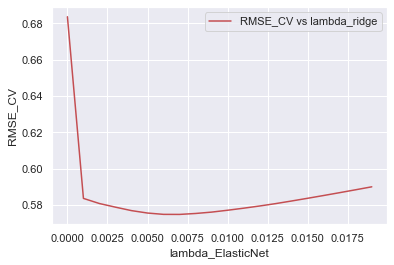

In [93]:
sns.lineplot(x='lambda_ElasticNet', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_ridge")
plt.show()

We found out that with elbow method the best alpha is 0.007 however with CV it is 0.006440286888331817. WE should trustht the CV method for optimalization and not the elbow method


# Lets use the optimal alpha (lambda) for Ridge, Lasso and Elastic Net Regression

In [99]:
# ging the regression model a class
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [100]:
#fitting our data set and predinct our dataset (We make predictions on our X_test data and evualte them with our y_test data)
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso  = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net  = model_net.fit(X_train, y_train).predict(X_test)

In [101]:
df_predictions = pd.DataFrame({'y_test': y_test,
                              'y_hat_linear': y_hat_linear,
                              'y_hat_ridge': y_hat_ridge,
                              'y_hat_lasso': y_hat_lasso,
                              'y_hat_net': y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.175576,0.154862,0.163279
4,-0.404102,-0.079686,-0.032038,-0.047122,-0.044388
62,-1.055680,-0.180921,-0.148966,-0.148200,-0.149537
63,2.538916,2.344482,2.083804,2.156366,2.139361
48,1.144605,-0.078630,-0.001604,-0.031199,-0.022572


In [102]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.256687,0.322054,0.308461
1,X2,0.103655,0.192091,0.156880,0.165614
2,X3,-2.133872,-0.963844,-1.183806,-1.151128
3,X4,0.253492,-0.041360,-0.000000,-0.000000
4,X5,1.593336,-0.221195,0.000000,-0.000000


**We can see that ridge regression got the coefficient of features X4 and X5 close to 0 however Lasso and Elastic Net Regression got the coefficient of features X4 and X5 to 0 which means they can be dropped for our Machine Learning Model**

**RMSE Linear Regression**

In [104]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

**RMSE Ridge Regression**

In [105]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.894

**RMSE Lasso Regression**

In [106]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.81

**RMSE Elastic Net Regression**

In [107]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.781

**We can see that the RSEM for Elastic Net Regression is the smallest compared to Linear, Lasso and Ridge Regression**